In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


In [2]:
y2010 = os.path.join("TX 2010 Speed Related Crashes Data.csv")
y2011 = os.path.join("TX 2011 Speed Related Crashes Data.csv")
y2012 = os.path.join("TX 2012 Speed Related Crashes Data.csv")
y2013 = os.path.join("TX 2013 Speed Related Crashes Data.csv")
y2014 = os.path.join("TX 2014 Speed Related Crashes Data.csv")
y2015 = os.path.join("TX 2015 Speed Related Crashes Data.csv")
y2016 = os.path.join("TX 2016 Speed Related Crashes Data.csv")

In [3]:
y2010_df = pd.read_csv(y2010, encoding = "ISO-8859-1")
y2011_df = pd.read_csv(y2011, encoding = "ISO-8859-1")
y2012_df = pd.read_csv(y2012, encoding = "ISO-8859-1")
y2013_df = pd.read_csv(y2013, encoding = "ISO-8859-1")
y2014_df = pd.read_csv(y2014, encoding = "ISO-8859-1")
y2015_df = pd.read_csv(y2015, encoding = "ISO-8859-1")
y2016_df = pd.read_csv(y2016, encoding = "ISO-8859-1")

In [4]:
y2010_df.head(2)

,Crash ID,Agency,City,County,Crash Death Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,...,Manner of Collision,Population Group,Road Class,Speed Limit,Weather Condition,Vehicle Color,Person Age,Person Ethnicity,Person Gender,Person Type
0,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Gray,28,Black,Male,Driver
1,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Red,17,Hispanic,Male,Driver


In [5]:
speedlimit_crash_df = y2010_df.append(y2011_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2012_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2013_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2014_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2015_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2016_df)
speedlimit_crash_df.head(2)

,Crash ID,Agency,City,County,Crash Death Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,...,Manner of Collision,Population Group,Road Class,Speed Limit,Weather Condition,Vehicle Color,Person Age,Person Ethnicity,Person Gender,Person Type
0,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Gray,28,Black,Male,Driver
1,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Red,17,Hispanic,Male,Driver


In [6]:
speedlimit_crash_df = speedlimit_crash_df.drop_duplicates(['Crash ID'], keep='first')
speedlimit_crash_df.head(2)

,Crash ID,Agency,City,County,Crash Death Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,...,Manner of Collision,Population Group,Road Class,Speed Limit,Weather Condition,Vehicle Color,Person Age,Person Ethnicity,Person Gender,Person Type
0,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Gray,28,Black,Male,Driver
2,11154515,"Department Of Public Safety, State Of Texas",Rural Wilbarger County,Wilbarger,0,Not Injured,845,0,2010,Friday,...,One Motor Vehicle - Going Straight,Rural,US & State Highways,70,Cloudy,White,33,White,Female,Driver


In [7]:
speedlimit_crash_df = speedlimit_crash_df[['Speed Limit','Crash Total Injury Count']]


In [8]:
df_sample=speedlimit_crash_df.sample(5000)


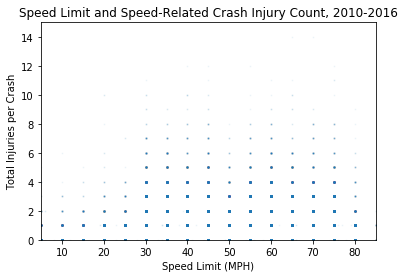

In [21]:
import seaborn as sns
plt.plot('Speed Limit', 'Crash Total Injury Count', data=speedlimit_crash_df, linestyle='none', marker='o', markersize=0.9, alpha=0.05)
plt.title("Speed Limit and Speed-Related Crash Injury Count, 2010-2016")
plt.ylabel("Total Injuries per Crash")
plt.xlabel("Speed Limit (MPH)")
plt.ylim((0,15))
plt.xlim((5,85))

plt.show()

### Speed Limit and Crash Injury Count
#### * Uses a sample size of 5000
#### * The greatest number of crashes and injuries occured between 30 and 75 MPH.
#### * Most speed-related crashes have less than one injury per crash.
#### * The highest rate of injuries per crash occurs at speed limits between 30 and 75 miles per hour.
#### * Total injuries per crash are almost twice as high at speed limits greater than 30 MPH.

In [17]:
speedlimit_grouped = pd.DataFrame(speedlimit_crash_df.groupby(["Speed Limit"]).count()["Crash Total Injury Count"])
speedlimit_grouped=speedlimit_grouped.reset_index()
speedlimit_grouped.head()

,Speed Limit,Crash Total Injury Count
0,-1,3099
1,0,4936
2,5,456
3,6,3
4,8,1


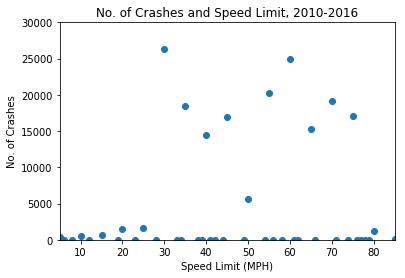

In [12]:
plt.plot('Speed Limit', 'Crash Total Injury Count', data=speedlimit_grouped, linestyle='none', marker='o')
plt.title("No. of Crashes and Speed Limit, 2010-2016")
plt.ylabel("No. of Crashes")
plt.xlabel("Speed Limit (MPH)")
plt.ylim((1,30000))
plt.xlim((5,85))

plt.show()

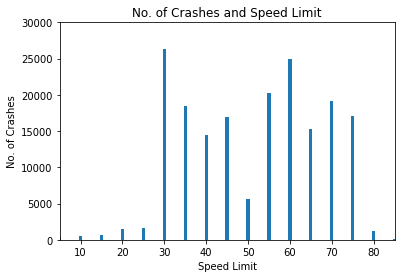

In [13]:
plt.bar('Speed Limit', 'Crash Total Injury Count', data=speedlimit_grouped)
plt.title("No. of Crashes and Speed Limit")
plt.ylabel("No. of Crashes")
plt.xlabel("Speed Limit")
plt.ylim((1,30000))
plt.xlim((5,85))

plt.show()

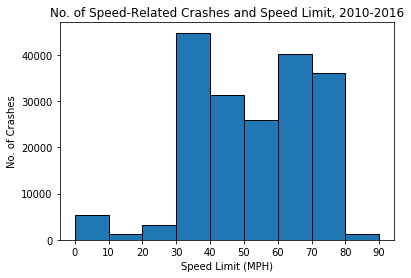

In [19]:
bins= [0,10,20,30,40,50,60,70,80,90]
plt.hist(speedlimit_crash_df["Speed Limit"], bins = bins, edgecolor="k")
plt.xticks(bins)
plt.title("No. of Speed-Related Crashes and Speed Limit, 2010-2016")
plt.ylabel("No. of Crashes")
plt.xlabel("Speed Limit (MPH)")

plt.show()

### No. of Crashes and Speed Limit
#### * The majority of crashes occurred between 30 and 79 MPH speed limits with the greatest amount in the 30-39 MPH speed limits.
#### * Speeding in 30-39 MPH speed zones caused the most crashes